In [1]:
%matplotlib inline

# %matplotlib notebook

import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [2]:
n = 0.1
# m = 0.25
gamma = 1

In [3]:
def bazykin(t, y):
    return np.array([
        ((1 - y[0]) * y[0]**2)/(n + y[0]) - y[0] * y[1],
        gamma * (y[0] - m) * y[1]])

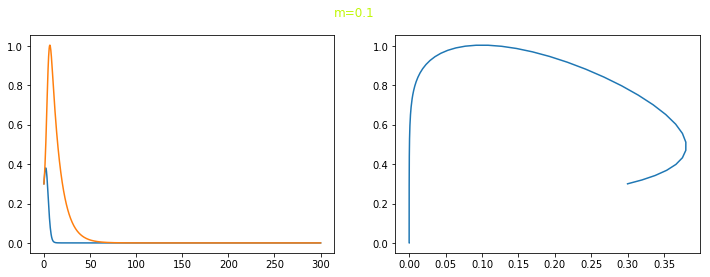

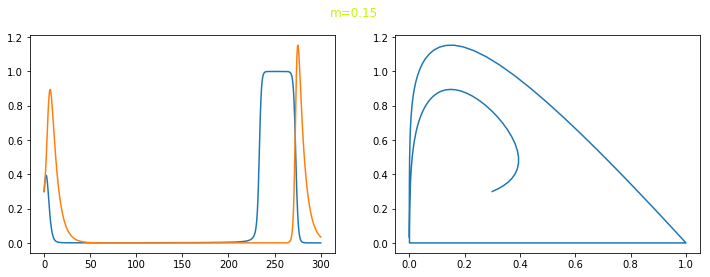

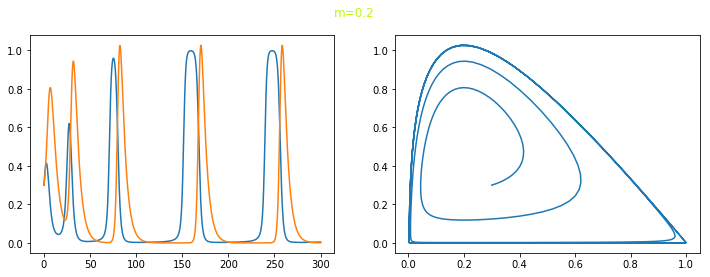

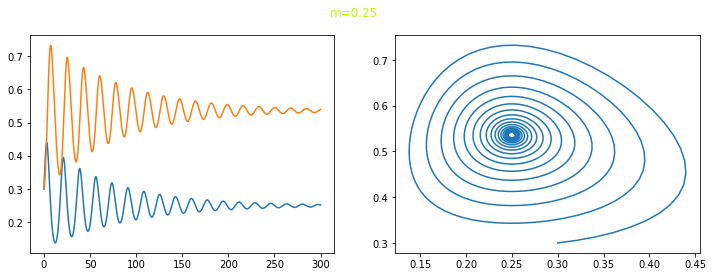

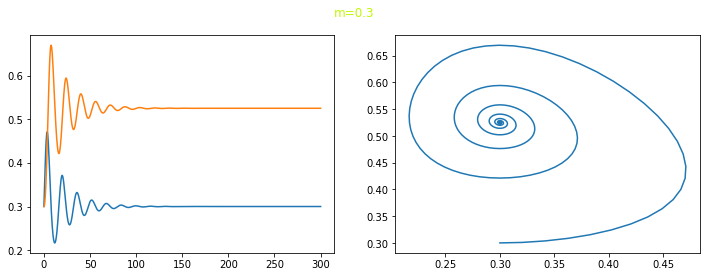

In [5]:
for m in np.arange(0.1, 0.35, 0.05):
    t0, t1 = 0, 300
    t = np.linspace(t0, t1, 1000)
    y0 = [0.3, 0.3]
    y = np.zeros((len(t), len(y0)))
    y[0, :] = y0
    x = y[1, :]
    r = integrate.ode(bazykin).set_integrator("dopri5")  # choice of method
    r.set_initial_value(y0, t0)
    for i in range(1, t.size):
        y[i, :] = r.integrate(t[i])
        if not r.successful():
            raise RuntimeError("Could not integrate")
#     plt.plot(t, y)
#     plt.show()
#     plt.plot(y[:, 0], y[:, 1])
#     plt.show()
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(t, y)
    # ax1.set_title('m=' + str(round(m, 2)), color='xkcd:cyan')
    ax2.plot(y[:, 0], y[:, 1])
    fig.suptitle('m=' + str(round(m, 2)), color='xkcd:chartreuse')